In [111]:
import pandas as pd
import numpy as np
import missingno as msno
import json
import folium

In [112]:
tree_dat = pd.read_csv( 'trees2015.csv' )#, dtype=str )
#tree_dat.info()

In [113]:
cols_4Qs = [ 'spc_common', 'boroname', 'health', 'steward', 'zipcode', 'zip_city', 'borocode', 'latitude', 'longitude' ]

tree_dat_4Qs = tree_dat[ cols_4Qs ]
print( tree_dat_4Qs.head() )
print( tree_dat_4Qs.info() )

        spc_common  boroname health steward  zipcode      zip_city  borocode  \
0        red maple    Queens   Fair    None    11375  Forest Hills         4   
1          pin oak    Queens   Fair    None    11357    Whitestone         4   
2      honeylocust  Brooklyn   Good    1or2    11211      Brooklyn         3   
3      honeylocust  Brooklyn   Good    None    11211      Brooklyn         3   
4  American linden  Brooklyn   Good    None    11215      Brooklyn         3   

    latitude  longitude  
0  40.723092 -73.844215  
1  40.794111 -73.818679  
2  40.717581 -73.936608  
3  40.713537 -73.934456  
4  40.666778 -73.975979  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   spc_common  652169 non-null  object 
 1   boroname    683788 non-null  object 
 2   health      652172 non-null  object 
 3   steward     652173 non-null  object 
 

In [114]:
print( set( tree_dat_4Qs['zipcode'] ) )
print( set( tree_dat_4Qs['spc_common'] ) )

{10280, 10281, 10282, 10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10312, 10314, 83, 11354, 11355, 11356, 11357, 11358, 11360, 11361, 11362, 11363, 11364, 11365, 11366, 11367, 11368, 11369, 11370, 11371, 11372, 11373, 11374, 11375, 11377, 11378, 11379, 11385, 11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11423, 11426, 11427, 11428, 11429, 11430, 11432, 11433, 11434, 11435, 11436, 11451, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 10020, 11001, 11004, 11005, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 10017, 10018, 10019, 11040, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10048, 10065, 10069, 11096, 10075, 11101, 11102, 11103, 11104, 11105, 11106, 1

In [115]:
decendingTrees = tree_dat_4Qs.groupby('spc_common').size().reset_index(name='counts').sort_values( 'counts' )

decendingTrees.iloc[30:60]

,spc_common,counts
66,cucumber magnolia,169
106,sassafras,171
13,Chinese chestnut,173
99,pond cypress,181
7,Amur cork tree,183
130,white pine,202
117,spruce,202
35,Oklahoma redbud,219
94,paperbark maple,220
126,two-winged silverbell,221


{'Japanese hornbeam', 'silver linden', 'pin oak', 'scarlet oak', 'Japanese snowbell', 'Atlas cedar', 'black walnut', 'maple', 'Persian ironwood', 'black oak', 'silver birch', 'bald cypress', 'pagoda dogwood', 'empress tree', 'pignut hickory', 'crab apple', 'eastern redbud', 'American hornbeam', 'green ash', 'London planetree', 'black pine', 'northern red oak', 'European alder', 'shingle oak', 'mulberry', 'Amur maple', 'red horse chestnut', 'red pine', 'pine', 'dawn redwood', "Schumard's oak", 'Amur cork tree', 'American hophornbeam', 'Douglas-fir', 'spruce', 'honeylocust', 'white oak', 'cherry', 'sycamore maple', 'Callery pear', 'Atlantic white cedar', 'tree of heaven', 'black locust', 'Chinese fringetree', 'Chinese elm', 'white ash', 'Kentucky yellowwood', 'Sophora', 'Japanese zelkova', 'blackgum', 'American larch', 'pond cypress', 'sawtooth oak', 'silver maple', 'sweetgum', 'blue spruce', 'Virginia pine', 'two-winged silverbell', 'American beech', "'Schubert' chokecherry", 'ash', 'Am

/home/bonzilla/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:305: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.

/home/bonzilla/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:305: UserWarning:

Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.



(652167, 9)

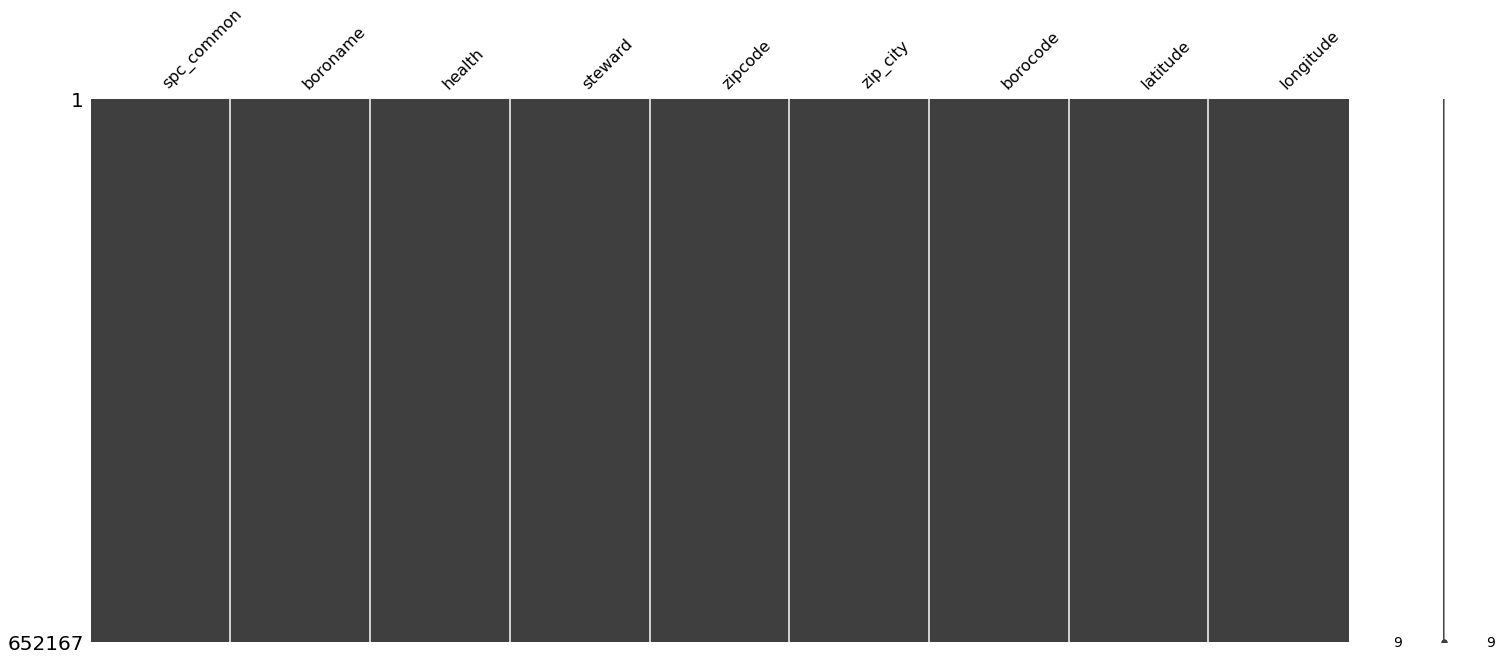

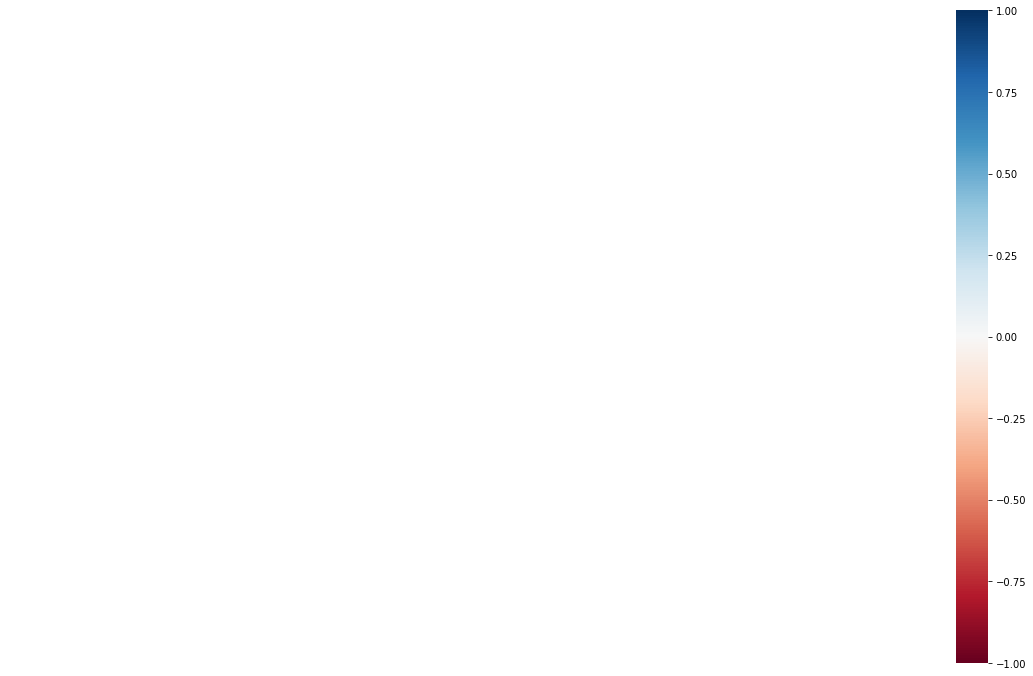

In [233]:
# %% cleaning data

#exp = tree_dat_4Qs.head(20) 
print( set( tree_dat_4Qs['spc_common' ] ) )
print( set( tree_dat_4Qs['health' ] ) )
print( set( tree_dat_4Qs['steward' ] ) )

print( tree_dat_4Qs.info() )

# not all tree have info for columns we need species, health, steward
sorted_tree_dat = tree_dat_4Qs.sort_values( by=['spc_common'] )

msno.matrix( sorted_tree_dat )
msno.heatmap( sorted_tree_dat )

# Wow, OKay, how lucky: missingness is totally correlated. Will just drop rows with nan.
tree_dat_4Qs = tree_dat_4Qs.dropna()
tree_dat_4Qs.shape

In [236]:
#tree_dat_4Qs.to_csv('tree_dat_4Qs.csv', index=False)
url = 'https://raw.githubusercontent.com/SmilodonCub/DATA608/master/tree_dat_4Qs.csv'
trees_from_git = pd.read_csv(url)
trees_from_git.head()

,spc_common,boroname,health,steward,zipcode,zip_city,borocode,latitude,longitude
0,red maple,Queens,Fair,None,11375,Forest Hills,4,40.723092,-73.844215
1,pin oak,Queens,Fair,None,11357,Whitestone,4,40.794111,-73.818679
2,honeylocust,Brooklyn,Good,1or2,11211,Brooklyn,3,40.717581,-73.936608
3,honeylocust,Brooklyn,Good,None,11211,Brooklyn,3,40.713537,-73.934456
4,American linden,Brooklyn,Good,None,11215,Brooklyn,3,40.666778,-73.975979


In [117]:
NY_coords = [ 40.7128, -74.0060 ]
#CartoDB” (positron and dark_matter) “OpenStreetMap”
#“Stamen” (Terrain, Toner, and Watercolor)
ny_map = folium.Map( location = NY_coords, tiles = 'Stamen Watercolor', zoom_start = 10 )
ny_map

In [118]:
tree_dat_4Qs['health'].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [119]:
from folium.plugins import MarkerCluster
df_species = tree_dat_4Qs[ tree_dat_4Qs[ 'spc_common' ] == 'crepe myrtle' ]
def map_certain_trees( df_species ):
    health_class = [ 'Poor', 'Fair', 'Good' ]
    class_color = [ 'red', 'orange', 'green' ]
    marker_cluster = MarkerCluster().add_to( ny_map )
    for num,hclass in enumerate(health_class):
        df_species_class = df_species[ df_species[ 'health' ] == hclass ]
        for idx, row in df_species_class.iterrows():
            marker_poor = folium.Marker( location = [row['latitude'], row['longitude']],
                                        icon=folium.Icon(color=class_color[num], 
                                        icon='tree', prefix='fa')).add_to( marker_cluster )

In [120]:
map_certain_trees( df_species )

In [121]:
ny_map

In [122]:
# aggregate the data
boro_health_counts = df_species.groupby( ['boroname', 'health'] ).size().reset_index(name='counts_health')
boro_species_counts = df_species.groupby( ['boroname'] ).size().reset_index(name='counts_species')

In [123]:
boro_health_counts = boro_health_counts.merge( boro_species_counts, on = 'boroname' )
boro_health_counts['percent'] = boro_health_counts['counts_health']/boro_health_counts['counts_species']*100
# Create the dictionary
health_dictionary ={'Poor' : 1, 'Fair' : 2, 'Good' : 3}
color_dictionary ={'Poor' : 'gold', 'Fair' : 'greenyellow', 'Good' : 'forestgreen'}
boro_health_counts['rank_health'] = boro_health_counts['health'].map( health_dictionary )
boro_health_counts['color_health'] = boro_health_counts['health'].map( color_dictionary )
boro_health_counts = boro_health_counts.sort_values( by = ['boroname','rank_health'] ).reset_index()
boro_health_counts

,index,boroname,health,counts_health,counts_species,percent,rank_health,color_health
0,2,Bronx,Poor,5,45,11.111111,1,gold
1,0,Bronx,Fair,7,45,15.555556,2,greenyellow
2,1,Bronx,Good,33,45,73.333333,3,forestgreen
3,5,Brooklyn,Poor,3,65,4.615385,1,gold
4,3,Brooklyn,Fair,6,65,9.230769,2,greenyellow
5,4,Brooklyn,Good,56,65,86.153846,3,forestgreen
6,6,Manhattan,Good,5,5,100.000000,3,forestgreen
7,9,Queens,Poor,6,240,2.500000,1,gold
8,7,Queens,Fair,28,240,11.666667,2,greenyellow
9,8,Queens,Good,206,240,85.833333,3,forestgreen


In [124]:
# functionaliza boro_health_counts
def find_boro_health_counts( df_species, color_dictionary, health_dictionary ):
    # find counts
    boro_health_counts = df_species.groupby( ['boroname', 'health'] ).size().reset_index(name='counts_health')
    boro_species_counts = df_species.groupby( ['boroname'] ).size().reset_index(name='counts_species')
    boro_health_counts = boro_health_counts.merge( boro_species_counts, on = 'boroname' )
    boro_health_counts['percent'] = boro_health_counts['counts_health']/boro_health_counts['counts_species']*100
    boro_health_counts['rank_health'] = boro_health_counts['health'].map( health_dictionary )
    boro_health_counts['color_health'] = boro_health_counts['health'].map( color_dictionary )
    boro_health_counts = boro_health_counts.sort_values( by = ['boroname','rank_health'] ).reset_index()
    return boro_health_counts

In [125]:
counts = find_boro_health_counts( df_species, color_dictionary, health_dictionary )
counts

,index,boroname,health,counts_health,counts_species,percent,rank_health,color_health
0,2,Bronx,Poor,5,45,11.111111,1,gold
1,0,Bronx,Fair,7,45,15.555556,2,greenyellow
2,1,Bronx,Good,33,45,73.333333,3,forestgreen
3,5,Brooklyn,Poor,3,65,4.615385,1,gold
4,3,Brooklyn,Fair,6,65,9.230769,2,greenyellow
5,4,Brooklyn,Good,56,65,86.153846,3,forestgreen
6,6,Manhattan,Good,5,5,100.000000,3,forestgreen
7,9,Queens,Poor,6,240,2.500000,1,gold
8,7,Queens,Fair,28,240,11.666667,2,greenyellow
9,8,Queens,Good,206,240,85.833333,3,forestgreen


Following a great example: [Drawing a Gauge with `matplotlib`](http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/)

In [126]:
def needle_dir( boro_prop ):
    num_rows = boro_prop.shape[0]
    ticks = []
    if num_rows == 3:
        ranges = [ [0, boro_prop[0]], 
             [boro_prop[0], boro_prop[0] + boro_prop[1]],
             [boro_prop[0] + boro_prop[1], boro_prop[0] + boro_prop[1] + boro_prop[2]]]
    elif num_rows == 2:
        ranges = [ [0, boro_prop[0]], 
             [boro_prop[0], boro_prop[0] + boro_prop[1]]]
    elif num_rows == 1:
        ranges = [ [0, boro_prop[0]]]
    maxidx = boro_prop.idxmax()
    needle_dir = sum( ranges[maxidx] )/2
    tick_placement = [ sum(val)/2 for val in ranges ]
    tick_labels = [ str( round( val[1]-val[0],1 ))+'%' for val in ranges ]
    needle_dir = needle_dir*180/100 #rescale from 0-100 to 0-180
    needle_dir = 180-needle_dir #flip axis direction
    return needle_dir, maxidx, tick_placement, tick_labels

In [127]:
bronx_percent = boro_health_counts[ boro_health_counts['boroname']=='Bronx']
bronx_percent = bronx_percent['percent']
#bronx_percent.idxmax()
bronx_nd, maxid, ticks, labels = needle_dir( bronx_percent )
labels


['11.1%', '15.6%', '73.3%']

In [128]:
import plotly.graph_objects as go

bronx_nd, maxid, ticks, labels = needle_dir( bronx_percent )


fig = go.Figure(go.Indicator(
    mode = "gauge",
    #value = 0,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Bronx", 'font': {'size': 36}},
    gauge = {
        'axis': {'range': [None, 100], 'tickwidth': 3, 'tickcolor': "gray", 
                 'tickfont': { 'size':20}, 'tickvals': ticks, 'ticktext': labels},
        'bgcolor': "white",
        'borderwidth': 4,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, boro_health_counts['percent'][0]], 'color': 'gold'},
            {'range': [boro_health_counts['percent'][0], boro_health_counts['percent'][0] + boro_health_counts['percent'][1]], 
             'color': 'greenyellow'},
            {'range': [boro_health_counts['percent'][0] + boro_health_counts['percent'][1], 
                        boro_health_counts['percent'][0] + boro_health_counts['percent'][1] + boro_health_counts['percent'][2]], 
             'color': 'forestgreen'}
        ],

    }))

fig.update_layout(paper_bgcolor = "cornsilk", font = {'color': "gray", 'family': "Arial"},
                     xaxis={'showgrid': False, 'range':[-1,1], 'showticklabels':False},
                     yaxis={'showgrid': False, 'range':[0,1], 'showticklabels':False},
                     plot_bgcolor='rgba(0,0,0,0)')



r= 0.9
x_head = r * np.cos(np.radians(bronx_nd))
y_head = r * np.sin(np.radians(bronx_nd))

fig.add_annotation(
    ax=0,
    ay=0,
    axref='x',
    ayref='y',
    x=x_head,
    y=y_head,
    xref='x',
    yref='y',
    showarrow=True,
    arrowhead=3,
    arrowsize=2,
    arrowwidth=4,
    arrowcolor = 'gray'
    )

fig.show()

In [129]:
# functionalize the dial figure

def draw_boro_dial( boro_health_counts, boro ):
    boro_health_counts = boro_health_counts[ boro_health_counts['boroname'] == boro ].reset_index()
    boro_nd, maxidx, ticks, labels = needle_dir( boro_health_counts['percent'] )
    num_ranks = boro_health_counts.shape[0]
    colors = boro_health_counts['color_health']
    if num_ranks == 3:
        steps_list = [
            {'range': [0, boro_health_counts['percent'][0]], 'color': colors[0]},
            {'range': [boro_health_counts['percent'][0], boro_health_counts['percent'][0] + boro_health_counts['percent'][1]], 
             'color': colors[1]},
            {'range': [boro_health_counts['percent'][0] + boro_health_counts['percent'][1], 
                        boro_health_counts['percent'][0] + boro_health_counts['percent'][1] + boro_health_counts['percent'][2]], 
             'color': colors[2]}]
    elif num_ranks == 2:
        steps_list = [
            {'range': [0, boro_health_counts['percent'][0]], 'color': colors[0]},
            {'range': [boro_health_counts['percent'][0], boro_health_counts['percent'][0] + boro_health_counts['percent'][1]], 
             'color': colors[1]}]
    elif num_ranks == 1:
        steps_list = [
            {'range': [0, boro_health_counts['percent'][0]], 'color': colors[0]}]
    fig = go.Figure(go.Indicator(
    mode = "gauge",
    #value = 0,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': boro, 'font': {'size': 36}},     
    gauge = {
        'axis': {'range': [None, 100], 'tickwidth': 3, 'tickcolor': "gray", 
                 'tickfont': { 'size':20}, 'tickvals': ticks, 'ticktext': labels},
        'bgcolor': "white",
        'borderwidth': 4,
        'bordercolor': "gray",
        'steps': steps_list,
    }))

    fig.update_layout(paper_bgcolor = "cornsilk", font = {'color': "gray", 'family': "Arial"},
                      xaxis={'showgrid': False, 'range':[-1,1], 'showticklabels':False},
                      yaxis={'showgrid': False, 'range':[0,1], 'showticklabels':False},
                      plot_bgcolor='rgba(0,0,0,0)')

    theta = boro_nd
    r= 0.6
    x_head = r * np.cos(np.radians(theta))
    y_head = r * np.sin(np.radians(theta))

    fig.add_annotation( ax=0, ay=0, axref='x', ayref='y', x=x_head, y=y_head,
                       xref='x', yref='y', showarrow=True, arrowhead=3, 
                       arrowsize=2, arrowwidth=4, arrowcolor = colors[maxidx] )
    
    return fig

In [130]:
draw_boro_dial( boro_health_counts, 'Queens' )

In [131]:
draw_boro_dial( boro_health_counts, 'Manhattan' )

In [132]:
boros = boro_health_counts['boroname'].unique()

for boro in boros:
    print( boro )

Bronx
Brooklyn
Manhattan
Queens
Staten Island


In [133]:
fig = go.Figure()

# Create scatter trace of text labels
fig.add_trace(go.Scatter(
    x=[13, 13, 13],
    y=[4, 12, 20],
    text=["Poor",
          "Fair",
          "Good"],
    mode="text",
))

# Set axes properties
fig.update_xaxes(range=[0, 24])
fig.update_yaxes(range=[0, 24])


# Add shapes
fig.add_shape(type="rect",
    xref="paper", yref="paper",
    x0=3/12, y0=1/12,
    x1=5/12, y1=3/12,
    line=dict(
        color="gray",
        width=3,
    ),
    fillcolor='gold',
)

fig.add_shape(type="rect",
    xref="paper", yref="paper",
    x0=3/12, y0=5/12,
    x1=5/12, y1=7/12,
    line=dict(
        color="gray",
        width=3,
    ),
    fillcolor='greenyellow',
)

fig.add_shape(type="rect",
    xref="paper", yref="paper",
    x0=3/12, y0=9/12,
    x1=5/12, y1=11/12,
    line=dict(
        color="gray",
        width=3,
    ),
    fillcolor='forestgreen',
)

fig.update_layout(paper_bgcolor = "cornsilk", font = {'color': "gray", 'family': "Arial", 'size':36},
                      xaxis={'showgrid': False, 'showticklabels':False},
                      yaxis={'showgrid': False, 'showticklabels':False},
                      plot_bgcolor='rgba(0,0,0,0)')

fig.show()

In [134]:
# functionalize legend figure

def draw_dial_legend():
    # draw simple legend for dial plots
    fig = go.Figure()
    # Create scatter trace of text labels
    fig.add_trace(go.Scatter(
        x=[13, 13, 13],
        y=[4, 12, 20],
        text=["Poor","Fair","Good"],
        mode="text" ))
    # Set axes properties
    fig.update_xaxes(range=[0, 24])
    fig.update_yaxes(range=[0, 24])
    # Add shapes
    fig.add_shape(type="rect",
                  xref="paper", yref="paper",
                  x0=3/12, y0=1/12,
                  x1=5/12, y1=3/12,
                  line=dict(color="gray",width=3),
                  fillcolor='gold')
    fig.add_shape(type="rect",
                  xref="paper", yref="paper",
                  x0=3/12, y0=5/12,
                  x1=5/12, y1=7/12,
                  line=dict(color="gray",width=3),
                  fillcolor='greenyellow')
    fig.add_shape(type="rect",
                  xref="paper", yref="paper",
                  x0=3/12, y0=9/12,
                  x1=5/12, y1=11/12,
                  line=dict(color="gray",width=3),
                  fillcolor='forestgreen')
    fig.update_layout(paper_bgcolor = "cornsilk", font = {'color': "gray", 'family': "Arial", 'size':36},
                      xaxis={'showgrid': False, 'showticklabels':False},
                      yaxis={'showgrid': False, 'showticklabels':False},
                      plot_bgcolor='rgba(0,0,0,0)')
    return fig

In [135]:
legend = draw_dial_legend()
fig.show()

In [136]:
df_species['steward'].unique()

array(['1or2', 'None', '3or4', '4orMore'], dtype=object)

In [137]:
df_species.head()

,spc_common,boroname,health,steward,zipcode,zip_city,borocode,latitude,longitude
987,crepe myrtle,Bronx,Good,1or2,10460,Bronx,2,40.837111,-73.870072
2908,crepe myrtle,Brooklyn,Good,None,11230,Brooklyn,3,40.612892,-73.970616
3822,crepe myrtle,Brooklyn,Good,1or2,11208,Brooklyn,3,40.690346,-73.867948
5932,crepe myrtle,Brooklyn,Good,3or4,11208,Brooklyn,3,40.690274,-73.867932
6152,crepe myrtle,Queens,Good,1or2,11102,Astoria,4,40.766324,-73.927590


In [195]:
df_stewards = df_species.groupby(['boroname', 'health']).steward.value_counts()
df_stewards.name = 'steward_x_health_counts'
df_stewards = df_stewards.reset_index()

df_healthbn = df_species.groupby(['boroname']).steward.value_counts()
df_healthbn.name = 'steward_counts'
df_healthbn.reset_index()

df_stewards = df_stewards.merge( df_healthbn, on = ['boroname', 'steward'])
df_stewards['stewards_percent'] = round( 100*df_stewards['steward_x_health_counts']/df_stewards['steward_counts'],2 )
df_stewards

df_stewards.steward = pd.Categorical(df_stewards.steward, 
                      categories=["None","1or2","3or4","4orMore"],
                      ordered=True)

In [196]:
df_stewards = df_stewards.sort_values( ['steward', 'health']).reset_index()
df_stewards

,index,boroname,health,steward,steward_x_health_counts,steward_counts,stewards_percent
0,3,Bronx,Fair,None,1,15,6.67
1,8,Brooklyn,Fair,None,2,25,8.00
2,14,Queens,Fair,None,18,149,12.08
3,22,Staten Island,Fair,None,7,29,24.14
4,4,Bronx,Good,None,14,15,93.33
5,9,Brooklyn,Good,None,21,25,84.00
6,13,Manhattan,Good,None,2,2,100.00
7,15,Queens,Good,None,126,149,84.56
8,23,Staten Island,Good,None,18,29,62.07
9,10,Brooklyn,Poor,None,2,25,8.00


In [207]:
import plotly.graph_objects as go

fig = go.Figure()

fig.update_layout(
    template="simple_white",
    title = 'Impact of Stewards on Health Of NYC Trees',
    title_x=0.5,
    xaxis=dict(title_text="Number of Stewards grouped by NYC Borough"),
    yaxis=dict(title_text="%"),
    barmode="stack",
    paper_bgcolor = "cornsilk", 
    font = {'color': "gray", 'family': "Arial", 'size':18},
#    xaxis={'showgrid': False, 'showticklabels':False},
#    yaxis={'showgrid': False, 'showticklabels':False},
    plot_bgcolor='rgba(0,0,0,0)'
)

colors = ["gold", "greenyellow", "forestgreen"]
health_lev = ['Poor', 'Fair', 'Good']

for r, c in zip(health_lev, colors):
    plot_df = df_stewards[df_stewards['health'] == r]
    fig.add_trace(
        go.Bar(x=[plot_df.boroname, plot_df.steward], y=plot_df.stewards_percent, 
               name=r, marker_color=c),
    )

fig

In [208]:
def steward_impact_data( df_species ):
    #helper function to clean data
    
    #get counts grouped by boro, health & stewards
    df_stewards = df_species.groupby(['boroname', 'health']).steward.value_counts()
    df_stewards.name = 'steward_x_health_counts'
    df_stewards = df_stewards.reset_index()
    #get counts grouped by boro & steward
    df_healthbn = df_species.groupby(['boroname']).steward.value_counts()
    df_healthbn.name = 'steward_counts'
    df_healthbn.reset_index()
    #merge counts
    df_stewards = df_stewards.merge( df_healthbn, on = ['boroname', 'steward'])
    df_stewards['stewards_percent'] = round( 100*df_stewards['steward_x_health_counts']/df_stewards['steward_counts'],2 )
    df_stewards.steward = pd.Categorical(df_stewards.steward, 
                      categories=["None","1or2","3or4","4orMore"],
                      ordered=True)
    df_stewards = df_stewards.sort_values( ['steward', 'health']).reset_index()
    return df_stewards

In [209]:
a = steward_impact_data( df_species )
a

,index,boroname,health,steward,steward_x_health_counts,steward_counts,stewards_percent
0,3,Bronx,Fair,None,1,15,6.67
1,8,Brooklyn,Fair,None,2,25,8.00
2,14,Queens,Fair,None,18,149,12.08
3,22,Staten Island,Fair,None,7,29,24.14
4,4,Bronx,Good,None,14,15,93.33
5,9,Brooklyn,Good,None,21,25,84.00
6,13,Manhattan,Good,None,2,2,100.00
7,15,Queens,Good,None,126,149,84.56
8,23,Staten Island,Good,None,18,29,62.07
9,10,Brooklyn,Poor,None,2,25,8.00


In [227]:
def steward_impact_plot( df_steward ):
    fig = go.Figure()

    fig.update_layout(
        template="simple_white",
        title = 'Relative Proportion of Trees in Good Health',
        title_x=0.5,
        xaxis=dict(title_text="Number of Stewards grouped by NYC Borough"),
        yaxis=dict(title_text="%"),
        barmode="stack",
        paper_bgcolor = "cornsilk", 
        font = {'color': "gray", 'family': "Arial", 'size':18},
        plot_bgcolor='rgba(0,0,0,0)',
        width=1000,
        height=500,)

    colors = ["gold", "greenyellow", "forestgreen"]
    health_lev = ['Poor', 'Fair', 'Good']

    for r, c in zip(health_lev, colors):
        plot_df = df_stewards[df_stewards['health'] == r]
        fig.add_trace( go.Bar(x=[plot_df.boroname, plot_df.steward], 
                              y=plot_df.stewards_percent, name=r, marker_color=c) )
    return fig

In [228]:
p = steward_impact_plot( a )
p

In [231]:
def steward_numerosity_plot( df_steward ):
    fig = go.Figure()

    fig.update_layout(
        template="simple_white",
        title = 'Numerosity of Trees',
        title_x=0.5,
        xaxis=dict(title_text="Number of Stewards grouped by NYC Borough"),
        yaxis=dict(title_text="Count"),
        barmode="stack",
        paper_bgcolor = "cornsilk", 
        font = {'color': "gray", 'family': "Arial", 'size':18},
        plot_bgcolor='rgba(0,0,0,0)',
        width=1000,
        height=500,)

    colors = ["gold", "greenyellow", "forestgreen"]
    health_lev = ['Poor', 'Fair', 'Good']

    for r, c in zip(health_lev, colors):
        plot_df = df_stewards[df_stewards['health'] == r]
        fig.add_trace( go.Bar(x=[plot_df.boroname, plot_df.steward], 
                              y=plot_df.steward_x_health_counts, name=r, marker_color=c) )
    return fig

In [232]:
p2 = steward_numerosity_plot( a )
p2